In [69]:
library(tidyverse)
library(clusterGeneration)

# Principle Component Analysis

Principle component analysis (PCA) is a method of *dimensionality reduction* that takes the information in multiple variables/predictors, and presents that information (or at least MOST of it) in a smaller number of features. This smaller number of features--called components--are all linear combinations of all the original variables, and the features are created in a way (eigendecomposition, if you're interested!) that makes the 1st component contain the MOST variability in the data, the 2nd component contain the second most variability...and so on.

This allows us to choose only a handful of features (usually the first N features) that contain *most* of the information from the original data. This is helpful becuase few features often means faster models.

We discussed 2 ways to choose the number of components that you retain:


* a) **The Elbow Method**: create a scree plot, and find the "elbow" of the graph. Retain all the components at and before the elbow.
* b) **The Percentage Method**: specify a specific % of variance that's acceptable to retain (e.g. 95%), and retain enough components to achieve that %.
    
    
    
<img src="https://drive.google.com/uc?export=view&id=1crCW8BAFVEu50th9VhdJMYakZho03kp0" width = 500px />

# PCA with different variable correlations

PCA takes advantage of *relationships* between variables in order to create new axes/principle components. Let's look at what happens when we do PCA on datasets with differing levels of correlation between variables. 

You can grab all pairwise correlations between variables/features in your model by using the command `cor(df)` where `df` is your dataframe.

For the following datasets:

1. Look at the correlations between all the variables in the dataframe. Are they high? low?
2. Perform PCA
3. Make a Scree plot (be sure to add `+ ylim(0,1)`. What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw?

<img src="https://drive.google.com/uc?export=view&id=1gquRjmDWGDbuNSqcgVJ-py11VoxrfEJf" width = 200px />


TIP: to make the scree plot more clear, it can help to add the row [0,0,0] to your dataframe of the explained/cumulative variance. You can do this with:


## No Correlation

Let's start by simulating data where there is NO correlation between variables. We can do this using the `mvrnorm()` function from the `MASS` package.

First, we'll create the correlation maxtrix for our variables. We'll set all the *off-diagonal* values in the correlation matrix to 0. This indicates that there is no true correlation between any of our variables.

In [70]:
# correlation matrix for data with 11 variables
corr_mat <- matrix(c(1,0,0,0,0,0,0,0,0,0,
                     0,1,0,0,0,0,0,0,0,0,
                     0,0,1,0,0,0,0,0,0,0,
                     0,0,0,1,0,0,0,0,0,0,
                     0,0,0,0,1,0,0,0,0,0,
                     0,0,0,0,0,1,0,0,0,0,
                     0,0,0,0,0,0,1,0,0,0,
                     0,0,0,0,0,0,0,1,0,0,
                     0,0,0,0,0,0,0,0,1,0,
                     0,0,0,0,0,0,0,0,0,1), nrow = 10)

In [71]:
# vector of means, all 0
mus <- rep(0,10)

In [72]:
n <- 1000 # number of data points to generate

# simulate data
df <- data.frame(mvrnorm(n, mus, corr_mat))
head(df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1096274,0.6311393,-0.9596291,-0.7323051,-0.14779213,-1.3753179,-0.47333762,-2.5886031,-0.2941484,1.4442806
2,1.9354967,0.2399159,0.2097667,-0.7035887,0.06047212,0.7102712,0.04545359,0.9939615,-0.8600063,2.8231827
3,1.3859489,0.5503765,-1.0627896,-0.1281088,0.05055923,1.5878984,-0.50938754,-0.4855229,-0.8621119,1.9077577
4,-1.0425681,-0.5752031,0.1311647,-0.5687049,1.05313355,2.8076693,-0.25982215,0.9558012,0.3473054,-1.8313104
5,0.8682986,0.5690661,-1.3923369,0.2569471,0.01222314,0.9244128,-0.21554055,-0.8585091,1.0642480,1.5723576
6,0.7096250,1.2310001,1.0011715,-0.7641842,1.30117289,0.4774351,0.54425408,-0.7647182,0.1343800,-0.5486242


Now that we've generated our data, we can look at the correlations between variables. Notice that the correlations are not exactly 0, but most of them are very small.

In [73]:
round(cor(df),4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.0000,0.0501,0.0657,0.0011,-0.0641,-0.0118,-0.0111,0.0369,0.0192,0.0059
X2,0.0501,1.0000,-0.0153,-0.0381,-0.0199,-0.0358,-0.0142,0.0080,-0.0296,-0.0226
X3,0.0657,-0.0153,1.0000,0.0053,0.0318,-0.0154,-0.0237,0.0282,-0.0166,-0.0242
X4,0.0011,-0.0381,0.0053,1.0000,0.0078,0.0251,0.0123,-0.0080,-0.0146,0.0077
X5,-0.0641,-0.0199,0.0318,0.0078,1.0000,-0.0162,0.0474,0.0557,0.0256,-0.0361
X6,-0.0118,-0.0358,-0.0154,0.0251,-0.0162,1.0000,-0.0403,0.0404,0.0235,0.0114
X7,-0.0111,-0.0142,-0.0237,0.0123,0.0474,-0.0403,1.0000,-0.0164,0.0065,0.0059
X8,0.0369,0.0080,0.0282,-0.0080,0.0557,0.0404,-0.0164,1.0000,0.0099,-0.0163
X9,0.0192,-0.0296,-0.0166,-0.0146,0.0256,0.0235,0.0065,0.0099,1.0000,-0.0380
X10,0.0059,-0.0226,-0.0242,0.0077,-0.0361,0.0114,0.0059,-0.0163,-0.0380,1.0000


Now let's perform PCA using `prcomp()`, and create a scree plot using `ggplot()`.

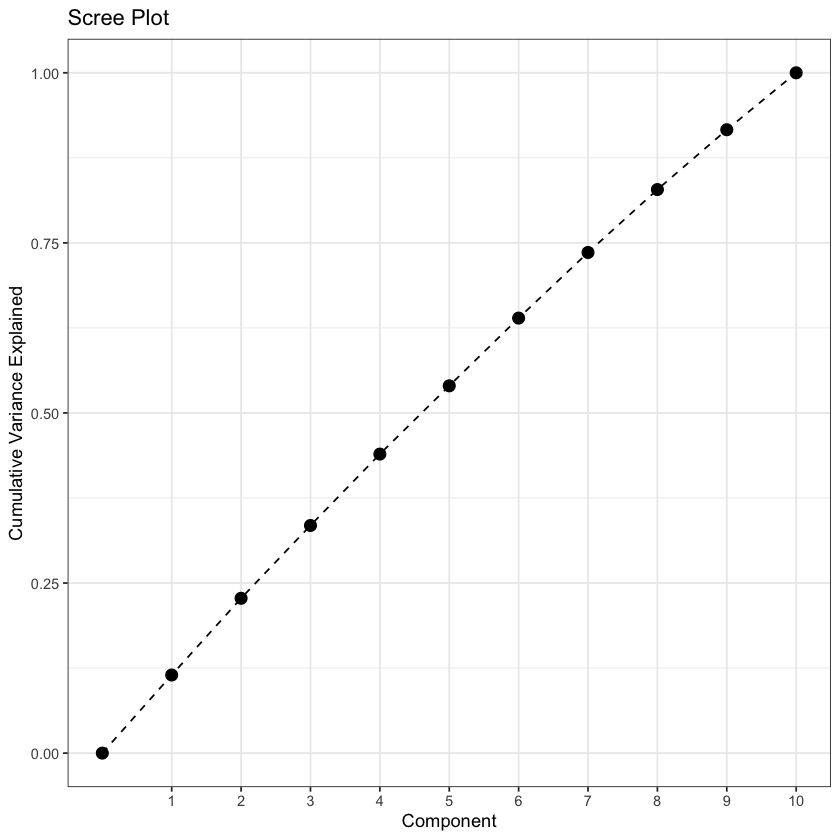

In [74]:
# create PCA model
pca <- prcomp(df)

# calculate eigenvalues
eigs <- pca$sdev^2

# calculate cumulative variance explained
cum <- cumsum(eigs)/sum(eigs)
comp <- 1:length(mus)

# create dataframe of cumulative variance
df_scree = data.frame(cumulativeVar = c(0,cum),
                component = c(0,comp))

# plot
ggplot(df_scree, aes(component, cumulativeVar)) +
  geom_line(lty = 2) + geom_point(size = 3) +
  labs(x = "Component",
       y = "Cumulative Variance Explained",
       title = "Scree Plot") + ylim(0,1) +
scale_x_continuous(breaks = 1:10) +
theme_bw() + theme(panel.grid.minor.x = element_blank())

### *Question*

What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw? You can re-run the code above to get a different random sample of data.

<img src="https://drive.google.com/uc?export=view&id=1gquRjmDWGDbuNSqcgVJ-py11VoxrfEJf" width = 200px />

## Large Correlation

Now let's try to simulate data where the correlation between variables is high. We'll do this by setting the *off-diagonals* in our correlation matrix to be high (near 1).


In [75]:
# correlation matrix for data with 10 variables
corr_mat <- matrix(c(1,0.8786,0.8844,0.8929,0.8948,0.8678,0.8893,0.8999,0.8735,0.8763,
                     0.8786,1,0.8847,0.8773,0.8728,0.9108,0.8956,0.8691,0.873,0.8724,
                     0.8844,0.8847,1,0.8772,0.8748,0.871,0.883,0.8722,0.8713,0.8703,
                     0.8929,0.8773,0.8772,1,0.859,0.8821,0.8847,0.8626,0.8707,0.8752,
                     0.8948,0.8728,0.8748,0.859,1,0.8594,0.8758,0.888,0.8561,0.8715,
                     0.8678,0.9108,0.871,0.8821,0.8594,1,0.8744,0.884,0.8707,0.863,
                     0.8893,0.8956,0.883,0.8847,0.8758,0.8744,1,0.8871,0.8825,0.8992,
                     0.8999,0.8691,0.8722,0.8626,0.888,0.884,0.8871,1,0.8536,0.8868,
                     0.8735,0.873,0.8713,0.8707,0.8561,0.8707,0.8825,0.8536,1,0.8846,
                     0.8763,0.8724,0.8703,0.8752,0.8715,0.863,0.8992,0.8868,0.8846,1), nrow = 10)

In [76]:
# vector of means, all 0
mus <- rep(0,10)

In [77]:
n <- 1000 # number of data points to generate

# simulate data
df <- data.frame(mvrnorm(n, mus, corr_mat))
head(df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.48919387,-0.03651116,-0.16979240,-0.21202459,-0.5069741,-0.07896274,0.3004057,0.2091508,-0.36131725,0.3158395
2,0.09891988,0.48811232,-0.12643794,-0.09574794,-0.5643328,-0.16512593,0.2149134,-0.3301856,-0.02561995,0.0523691
3,0.24098886,0.51167940,0.04325583,0.29212682,0.7990355,0.05690105,0.4430442,0.6296123,0.18001819,0.3424351
4,1.17752371,0.74911680,0.99495822,0.29372138,0.7162655,0.39799109,1.1962264,0.1121187,0.95204058,-0.1124791
5,2.88981137,2.36224000,1.95463121,2.21753445,1.4222774,2.24411551,2.7436517,2.2711078,1.92674540,2.4186452
6,0.65655572,0.80071392,0.78567806,0.20217937,0.4905684,0.59573827,0.3802888,0.9109822,0.67013717,0.7447719


Now that we've generated our data, we can look at the correlations between variables. Notice that the correlations are high.

In [78]:
round(cor(df),4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.0000,0.8792,0.8881,0.8924,0.8901,0.8627,0.8959,0.9024,0.8774,0.8807
X2,0.8792,1.0000,0.8913,0.8744,0.8646,0.9069,0.8983,0.8775,0.8705,0.8690
X3,0.8881,0.8913,1.0000,0.8765,0.8728,0.8673,0.8904,0.8715,0.8723,0.8711
X4,0.8924,0.8744,0.8765,1.0000,0.8456,0.8772,0.8818,0.8679,0.8648,0.8710
X5,0.8901,0.8646,0.8728,0.8456,1.0000,0.8457,0.8683,0.8825,0.8544,0.8663
X6,0.8627,0.9069,0.8673,0.8772,0.8457,1.0000,0.8712,0.8891,0.8615,0.8550
X7,0.8959,0.8983,0.8904,0.8818,0.8683,0.8712,1.0000,0.8927,0.8846,0.9054
X8,0.9024,0.8775,0.8715,0.8679,0.8825,0.8891,0.8927,1.0000,0.8581,0.8944
X9,0.8774,0.8705,0.8723,0.8648,0.8544,0.8615,0.8846,0.8581,1.0000,0.8819
X10,0.8807,0.8690,0.8711,0.8710,0.8663,0.8550,0.9054,0.8944,0.8819,1.0000


Now let's perform PCA using `prcomp()`, and create a scree plot using `ggplot()`.

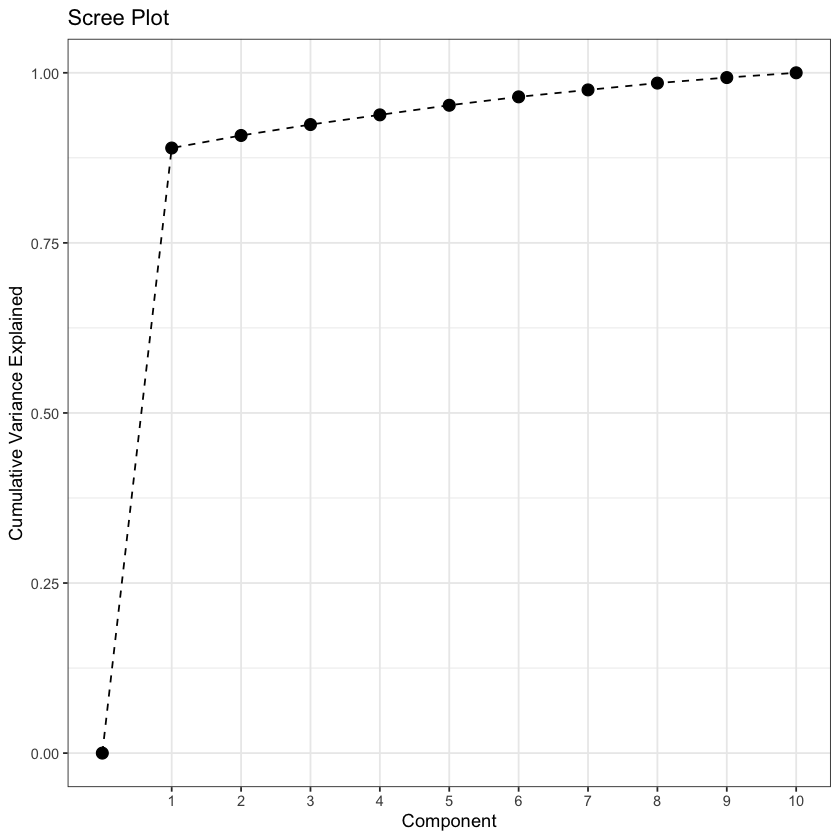

In [79]:
# create PCA model
pca <- prcomp(df)

# calculate eigenvalues
eigs <- pca$sdev^2

# calculate cumulative variance explained
cum <- cumsum(eigs)/sum(eigs)
comp <- 1:length(mus)

# create dataframe of cumulative variance
df_scree = data.frame(cumulativeVar = c(0,cum),
                component = c(0,comp))

# plot
ggplot(df_scree, aes(component, cumulativeVar)) +
  geom_line(lty = 2) + geom_point(size = 3) +
  labs(x = "Component",
       y = "Cumulative Variance Explained",
       title = "Scree Plot") + ylim(0,1) +
scale_x_continuous(breaks = 1:10) +
theme_bw() + theme(panel.grid.minor.x = element_blank())

### *Question*

What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw? You can re-run the code above to get a different random sample of data.

<img src="https://drive.google.com/uc?export=view&id=1gquRjmDWGDbuNSqcgVJ-py11VoxrfEJf" width = 200px />

## Random Correlation

Now let's try to simulate data where the correlation between variables is completely random. We'll do this by creating a correlation matrix using `rcorrmatrix()` from the `ClusterGeneration` package).


In [80]:
corr_mat <- rcorrmatrix(10)

# vector of means, all 0
mus <- rep(0,10)


n <- 1000 # number of data points to generate

# simulate data
df <- data.frame(mvrnorm(n, mus, corr_mat))
head(df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.2299596,1.43509301,0.1180787,-1.6627652,-0.2229810,0.4051625,0.8500736,0.47003729,1.21428929,0.7185197
2,-0.9177738,0.53046106,0.7829817,-0.1115777,-0.1305563,0.3643607,0.8320765,1.31265750,0.58691795,1.1056029
3,0.2824787,1.15643124,0.9490767,0.3060605,-0.6854427,0.8437801,0.8084781,-0.31733282,0.03735553,0.9802743
4,-1.7512511,0.03254022,-0.1945210,-1.2817859,-0.1272657,0.3117871,1.2375613,0.46968585,1.81826630,-1.2770978
5,-0.6931201,0.88567071,-0.6445257,-0.9664192,-1.4241361,0.3925008,1.1133028,-0.06557429,-0.55582166,0.4242264
6,-0.6270839,0.48055456,0.5658177,-0.3049534,-1.6899401,0.3484045,-0.2779083,-0.75052373,0.16888578,-1.5180127


Now that we've generated our data, we can look at the correlations between variables. Notice that the correlations are low for some variables and high for others.

In [81]:
round(cor(df),4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.0000,-0.0197,0.6318,0.2141,-0.1397,-0.1293,-0.3531,-0.1899,-0.3140,0.4658
X2,-0.0197,1.0000,0.2519,-0.3604,-0.2985,0.3389,0.1826,-0.4763,0.3916,0.0279
X3,0.6318,0.2519,1.0000,0.0349,-0.3819,0.1105,-0.4427,-0.2046,-0.0904,0.2498
X4,0.2141,-0.3604,0.0349,1.0000,0.3719,0.2303,0.0045,0.2342,-0.7776,0.5808
X5,-0.1397,-0.2985,-0.3819,0.3719,1.0000,-0.0967,0.3496,-0.0447,-0.0994,0.3408
X6,-0.1293,0.3389,0.1105,0.2303,-0.0967,1.0000,0.3830,-0.2962,-0.0163,0.1299
X7,-0.3531,0.1826,-0.4427,0.0045,0.3496,0.3830,1.0000,-0.3029,0.1725,0.1332
X8,-0.1899,-0.4763,-0.2046,0.2342,-0.0447,-0.2962,-0.3029,1.0000,-0.2825,-0.0378
X9,-0.3140,0.3916,-0.0904,-0.7776,-0.0994,-0.0163,0.1725,-0.2825,1.0000,-0.6103
X10,0.4658,0.0279,0.2498,0.5808,0.3408,0.1299,0.1332,-0.0378,-0.6103,1.0000


Now let's perform PCA using `prcomp()`, and create a scree plot using `ggplot()`.

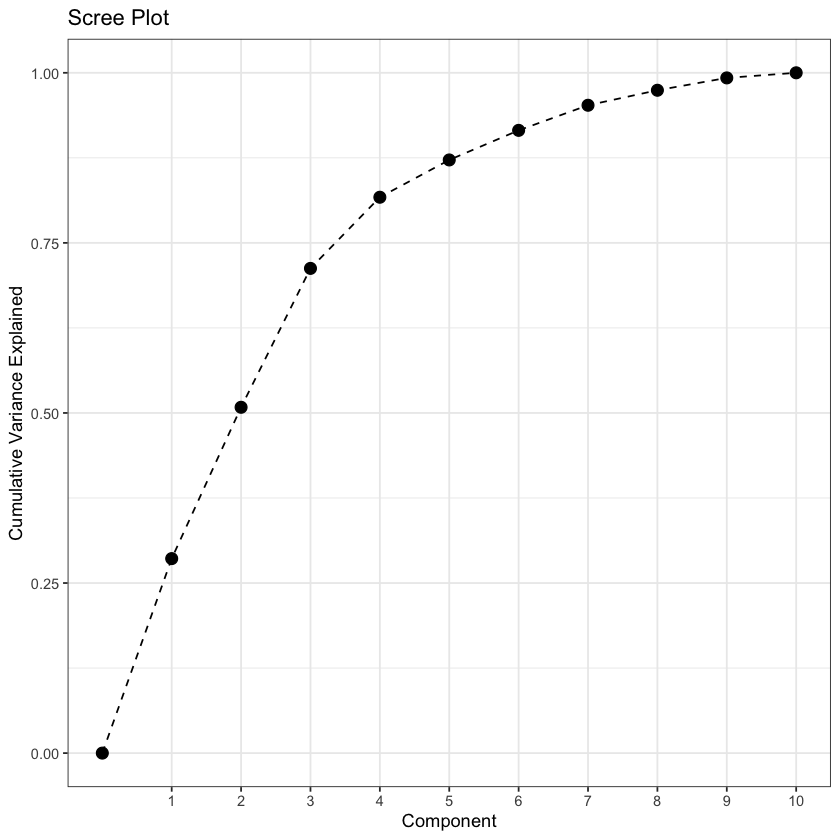

In [82]:
# create PCA model
pca <- prcomp(df)

# calculate eigenvalues
eigs <- pca$sdev^2

# calculate cumulative variance explained
cum <- cumsum(eigs)/sum(eigs)
comp <- 1:length(mus)

# create dataframe of cumulative variance
df_scree = data.frame(cumulativeVar = c(0,cum),
                component = c(0,comp))

# plot
ggplot(df_scree, aes(component, cumulativeVar)) +
  geom_line(lty = 2) + geom_point(size = 3) +
  labs(x = "Component",
       y = "Cumulative Variance Explained",
       title = "Scree Plot") + ylim(0,1) +
scale_x_continuous(breaks = 1:10) +
theme_bw() + theme(panel.grid.minor.x = element_blank())

### *Question*

What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw? You can re-run the code above to get a different random sample of data.

<img src="https://drive.google.com/uc?export=view&id=1gquRjmDWGDbuNSqcgVJ-py11VoxrfEJf" width = 200px />

## Two Groups of Highly Correlated Variables

Now let's try to simulate data where are two (uncorrelated) groups of related variables.


In [83]:
# correlation matrix for data with 10 variables
corr_mat <- matrix(c(1,0.7864,0.7831,0.7786,0.7782,-0.0048,-0.0363,0.0489,-0.0076,-0.0942,
                     0.7864,1,0.8151,0.8287,0.8045,-0.1035,-0.0709,0.0378,-0.0842,-0.1221,
                     0.7831,0.8151,1,0.8058,0.8043,-0.0786,-0.0936,0.0361,-0.0306,-0.1485,
                     0.7786,0.8287,0.8058,1,0.7902,-0.0941,-0.1114,0.0277,-0.083,-0.1245,
                     0.7782,0.8045,0.8043,0.7902,1,-0.1099,-0.1065,0.0081,-0.1043,-0.1792,
                     -0.0048,-0.1035,-0.0786,-0.0941,-0.1099,1,0.8176,0.7909,0.8438,0.8454,
                     -0.0363,-0.0709,-0.0936,-0.1114,-0.1065,0.8176,1,0.7694,0.7882,0.8269,
                     0.0489,0.0378,0.0361,0.0277,0.0081,0.7909,0.7694,1,0.7883,0.8314,-0.0076,
                     -0.0842,-0.0306,-0.083,-0.1043,0.8438,0.7882,0.7883,1,0.804,-0.0942,
                     -0.1221,-0.1485,-0.1245,-0.1792,0.8454,0.8269,0.8314,0.804,1), nrow = 10)

# vector of means, all 0
mus <- rep(0,10)


n <- 1000 # number of data points to generate

# simulate data
df <- data.frame(mvrnorm(n, mus, corr_mat))
head(df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8235242,-0.61141768,0.34255274,0.8208378,0.4127067,2.0857957,2.45484363,0.4258381,0.76298512,1.2693781
2,-0.1911398,0.07257054,0.26276989,-0.1278647,0.7088147,-0.9597861,0.64300812,-0.6358923,-1.23372892,-0.3554981
3,0.2119091,-0.37763240,0.01335117,-0.3070427,1.0319313,-0.8479186,-0.62145814,-1.1959444,-0.28679252,-0.7206294
4,1.0755550,0.67754135,0.55266855,1.2180351,0.3873281,0.7929518,0.21191501,1.1292615,0.34894532,1.0022377
5,-1.7280827,-1.19277615,-1.45052143,-2.1577590,-2.0092472,0.8769830,1.40588840,0.4668367,-0.07865585,0.9961128
6,0.6332940,0.83201351,0.19208645,0.3682000,0.5816972,-0.4280456,-0.07898064,-1.2197728,-1.12640028,-0.8452179


Now that we've generated our data, we can look at the correlations between variables. Notice that the correlations are low for some variables and high for others.

In [84]:
round(cor(df),4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.0000,0.7898,0.7840,0.7778,0.7812,0.0532,0.0001,0.0781,0.0559,-0.0604
X2,0.7898,1.0000,0.8095,0.8288,0.8001,-0.0723,-0.0572,0.0665,-0.0419,-0.1035
X3,0.7840,0.8095,1.0000,0.7995,0.8097,-0.0227,-0.0326,0.0916,0.0413,-0.0952
X4,0.7778,0.8288,0.7995,1.0000,0.7961,-0.0641,-0.0917,0.0522,-0.0357,-0.1161
X5,0.7812,0.8001,0.8097,0.7961,1.0000,-0.0688,-0.0750,0.0391,-0.0518,-0.1512
X6,0.0532,-0.0723,-0.0227,-0.0641,-0.0688,1.0000,0.8203,0.7678,0.8360,0.8457
X7,0.0001,-0.0572,-0.0326,-0.0917,-0.0750,0.8203,1.0000,0.7588,0.7870,0.8331
X8,0.0781,0.0665,0.0916,0.0522,0.0391,0.7678,0.7588,1.0000,0.7730,0.8214
X9,0.0559,-0.0419,0.0413,-0.0357,-0.0518,0.8360,0.7870,0.7730,1.0000,0.7995
X10,-0.0604,-0.1035,-0.0952,-0.1161,-0.1512,0.8457,0.8331,0.8214,0.7995,1.0000


Now let's perform PCA using `prcomp()`, and create a scree plot using `ggplot()`.

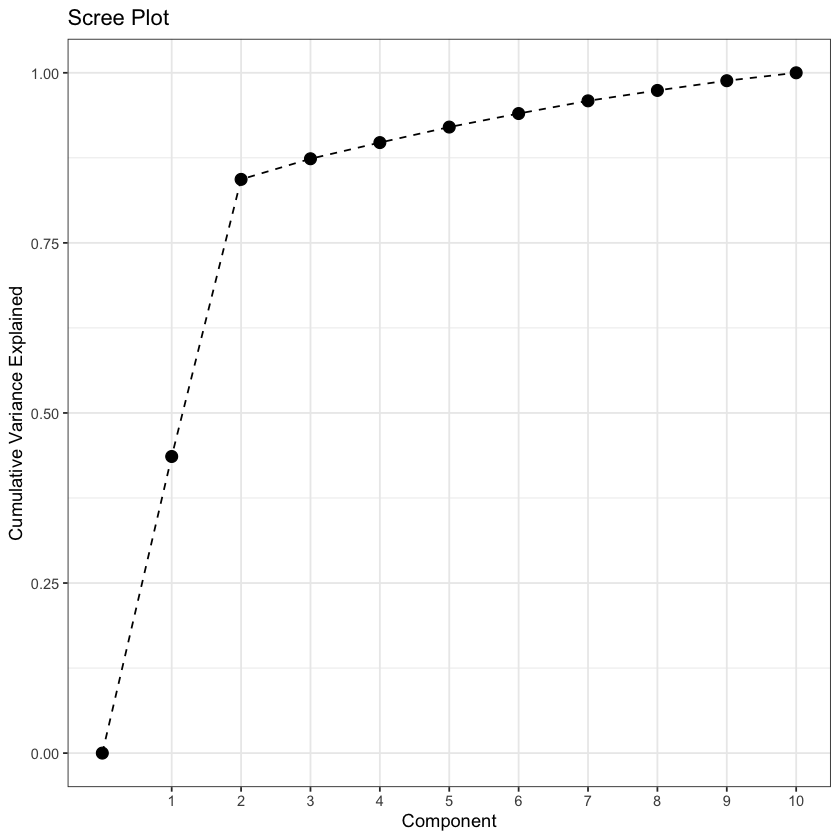

In [85]:
# create PCA model
pca <- prcomp(df)

# calculate eigenvalues
eigs <- pca$sdev^2

# calculate cumulative variance explained
cum <- cumsum(eigs)/sum(eigs)
comp <- 1:length(mus)

# create dataframe of cumulative variance
df_scree = data.frame(cumulativeVar = c(0,cum),
                component = c(0,comp))

# plot
ggplot(df_scree, aes(component, cumulativeVar)) +
  geom_line(lty = 2) + geom_point(size = 3) +
  labs(x = "Component",
       y = "Cumulative Variance Explained",
       title = "Scree Plot") + ylim(0,1) +
scale_x_continuous(breaks = 1:10) +
theme_bw() + theme(panel.grid.minor.x = element_blank())

### *Question*

What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw? You can re-run the code above to get a different random sample of data.

<img src="https://drive.google.com/uc?export=view&id=1gquRjmDWGDbuNSqcgVJ-py11VoxrfEJf" width = 200px />
